<a href="https://colab.research.google.com/github/JManuelRG/propiedades_termodinamicas/blob/main/Mezclas/Diagrama_de_Fases_No_Ideal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librería Thermopack
## Propiedades Termodinámicas de Mezclas

https://github.com/thermotools/thermopack

In [1]:
!pip install thermopack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.0 MB/s eta 0:00:00


In [3]:
# importar los modelos al cuaderno
from thermopack import saftvrmie, saftvrqmie, pcsaft, lee_kesler
from thermopack.cubic import SoaveRedlichKwong, RedlichKwong, PengRobinson, PengRobinson78
from thermopack.cubic import SchmidtWensel, PatelTeja, VanDerWaals
from thermopack.pcsaft import SPC_SAFT, PCP_SAFT

# Datos de la mezcla
# Ejecutar la siguiente celda para definir la mezcla a calcular:

# Consulta el identificador de cada sustancia en la Lista de fluidos:
https://github.com/thermotools/thermopack?tab=readme-ov-file#fluid-name-to-fluid-identifier-mapping

# Modelo a Usar para el cálculo de puntos de burbuja y de rocío

# Sintaxis:

# Mezcla Binaria
## variable_del_modelo = nombre_del_modelo('sust1, sust2')
-----------------------------------------

# Mezcla Multicomponente
## variable_del_modelo = nombre_del_modelo('sust1, sust2')

##**sust1, sust2, sust3** son identificadores para cada sustancia, se pueden consultar en la
#**Lista de Fluidos**:
## https://github.com/thermotools/thermopack?tab=readme-ov-file#fluid-name-to-fluid-identifier-mapping

# Modelos Termodinámicos Disponibles
| Identificador                        | Modelo           | Descripción                                                                                 |
|--------------------------------------|------------------|---------------------------------------------------------------------------------------------|
| Ec. de estado de SoaveRedlichKwong   | SoaveRedlichKwong| Ecuación cúbica utilizada para describir el comportamiento de gases reales.                 |
| Ec. de estado de RedlichKwong        | RedlichKwong     | Ecuación cúbica que mejora la ecuación de van der Waals para predicciones de gases reales.  |
| Ec. de estado de PengRobinson        | PengRobinson     | Ecuación cúbica comúnmente usada en ingeniería química para el modelado de fases de fluidos.|
| Ec. de estado de PengRobinson78      | PengRobinson78   | Variante de la ecuación de Peng-Robinson con ajustes específicos.                           |
| Ec. de estado de SchmidtWensel       | SchmidtWensel    | Ecuación utilizada para sistemas complejos, incluyendo mezclas de fluidos.                  |
| Ec. de estado de PatelTeja           | PatelTeja        | Ecuación cúbica desarrollada para mejorar predicciones en mezclas de hidrocarburos.         |
| Ec. de estado de VanDerWaals         | VanDerWaals      | Primera ecuación cúbica de estado que introdujo el concepto de volumen excluido y atracción entre moléculas.|
| Ec. de estado de saftvrmie           | saftvrmie        | Modelo estadístico avanzado para describir fluidos con estructuras complejas.               |
| Ec. de estado de saftvrqmie          | saftvrqmie       | Variante del modelo SAFT para aplicaciones específicas en fluidos complejos.                |
| Ec. de estado de pcsaft              | pcsaft           | Ecuación derivada de SAFT, optimizada para predicciones de fases de fluidos polares.        |
| Ec. de estado de lee_kesler          | lee_kesler       | Ecuación semi-empírica basada en el principio de estados correspondientes.                  |
| Ec. de estado de SPC_SAFT            | SPC_SAFT         | Variante del modelo SAFT para simulaciones moleculares de fluidos.                          |
| Ec. de estado de PCP_SAFT            | PCP_SAFT         | Variante del modelo SAFT adaptada para fluidos con interacciones específicas.               |


# Ejemplo con E. de Soave Redlich kwong

In [4]:
from thermopack.cubic import cubic
eos = cubic('MeOH,Benzene','SRK')

T = 300 # Kelvin
p = 1e5 # Pascal
x = [0.5,0.5] # Molar composition


In [3]:
from thermopack.cpa import SRK_CPA

eos = SRK_CPA('MEOH,BENZENE')  # CPA-SRK eos
T = 350
pxy = eos.get_binary_pxy(T)  # Returns a XYDiagram
print(pxy)

XYDiagram object with attributes (name : description)
lle  : Liquid 1 - Liquid 2 Equilibrium
	PxyEquilibrium object with attributes (description, name, value)
		Type of equilibrium                   type : lle
		Liquid 1 mole fraction, species 1     x1   : [], len(x1) = 0
		Liquid 2 mole fraction, species 1     x2   : [], len(x2) = 0
		Pressure                              p    : [], len(p) = 0
	
l1ve : Liquid 1 - Vapour Equilibrium
	PxyEquilibrium object with attributes (description, name, value)
		Type of equilibrium                   type : lve
		Liquid mole fraction, species 1       x    : [1.000e+00 ... 0.000e+00], len(x) = 676
		Vapour mole fraction, species 1       y    : [1.000e+00 ... 0.000e+00], len(y) = 676
		Pressure                              p    : [1.615e+05 ... 9.066e+04], len(p) = 676
	
l2ve : Liquid 2 - Vapour Equilibrium 
	PxyEquilibrium object with attributes (description, name, value)
		Type of equilibrium                   type : lve
		Liquid mole fraction, spec

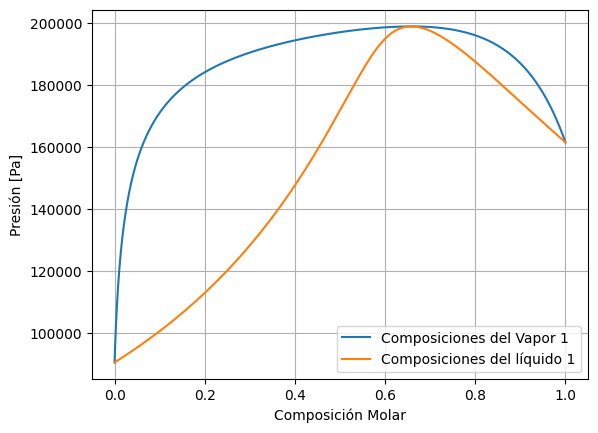

In [4]:
# Continued
import matplotlib.pyplot as plt

# Liquid-liquid phase boundaries
# pxy.lle holds the composition and pressure of the liquid phases
# plt.plot(pxy.lle.x1, pxy.lle.p, label='Composición Líquido 1') # lle.x1 is the mole fraction of component 1 (NC12) in Liquid 1 along the phase boundary
# plt.plot(pxy.lle.x2, pxy.lle.p, label='Liquid 2 composition') # lle.x2 is the mole fraction of component 1 (NC12) in Liquid 2 along the phase boundary

# Liquid 1-vapour phase boundaries
# pxy.l2ve holds composition and pressure along the Liquid 1 - Vapour phase boundary
plt.plot(pxy.l1ve.x, pxy.l1ve.p, label='Composiciones del Vapor 1') # l1ve.x is the mole fraction of component 1 (NC12) in Liquid 1 along the Liquid 1 - Vapour phase boundary
plt.plot(pxy.l1ve.y, pxy.l1ve.p, label='Composiciones del líquido 1') # l1ve.y is the mole fraction of component 1 (NC12) in the Vapour phase along the Liquid 1 - Vapour phase boundary

# Liquid 2-vapour phase boundaries
# L2VE[2] is the pressure along the Liquid 2 - Vapour phase boundary
# plt.plot(pxy.l2ve.x, pxy.l2ve.p, label='Liquid 2 bubble line') # l2ve.x is the mole fraction of component 1 (NC12) in Liquid 2 along the Liquid 2 - Vapour phase boundary
# plt.plot(pxy.l2ve.y, pxy.l2ve.p, label='Liquid 2 dew line') # l2ve.y is the mole fraction of component 1 (NC12) in the Vapour phase along the Liquid 2 - Vapour phase boundary

plt.ylabel('Presión [Pa]') # The third element in each tuple is the pressure along the phase boundary
plt.xlabel('Composición Molar')
plt.grid()
plt.legend()
plt.show()

In [ ]:
p = 1e5
lle, l1ve, l2ve = eos.get_binary_txy(p) # Unpacking the XYDiagram

# Liquid-liquid phase boundaries
# l1ve holds the composition and pressure of Liquid 1 and Vapour along the phase boundary
plt.plot(l1ve.x, l1ve.T, label='Liquid 1 composition') # l1ve.x is the mole fraction of component 1 (NC12) in Liquid 1 along the phase boundary
plt.plot(l1ve.y, l1ve.T, label='Vapour composition') # l1ve.y is the mole fraction of component 1 (NC12) in Vapour along the phase boundary

# ... etc ...